In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_govt_education_temp = pd.read_csv("../data/Govt_Expenditure_Eductation_csv.csv")
#df_govt_education_temp
countries = df_govt_education_temp.iloc[4:270,0]
date_range = df_govt_education_temp.iloc[3,24:66]
#date_range

In [5]:
df_govt_education_pd = pd.DataFrame(df_govt_education_temp.iloc[4:270,24:66].to_numpy(),index=list(countries),columns=list(date_range))
#df_govt_education_pd

In [6]:
df_govt_education_pd_year = df_govt_education_pd.sum(0)
nan_data = df_govt_education_pd.isna().to_numpy()
nan_shape = np.shape(nan_data)
nan_value = np.zeros(nan_shape)

np.shape(nan_value)

for row_iter in np.arange(nan_shape[0]):
    for col_iter in np.arange(nan_shape[1]):
        if nan_data[row_iter][col_iter] == False:
            nan_value[row_iter][col_iter] = 1
            
div_count = np.sum(nan_value,axis=0)
#div_count

In [7]:
govt_ed_spend_per_year = np.divide(df_govt_education_pd_year,div_count)
govt_ed_spend_per_year[-1] = 12.688041
#govt_ed_spend_per_year

C:\Users\ask2696\AppData\Local\Temp\ipykernel_22920\113761804.py:2: FutureWarning: Treating integers as positional in Series.__setitem__ with a Float64Index is deprecated. In a future version, `series[an_int] = val` will insert a new key into the Series. Use `series.iloc[an_int] = val` to treat the key as positional.
  govt_ed_spend_per_year[-1] = 12.688041


In [52]:
#np.median(df_govt_education_pd.to_numpy(),axis=0)

In [9]:
lit_rate_pd_temp = pd.read_csv("../data/Literacy_Rate_2.csv")
#lit_rate_pd_temp

In [11]:
date_range_lit_rate = lit_rate_pd_temp.iloc[3:44,0]
date_range_lit_rate_np = date_range_lit_rate.to_numpy()
#date_range_lit_rate_np

date_range_lit_rate_np = np.append(date_range_lit_rate_np,2021)
#date_range_lit_rate_np

date_range_plt = [str(x) for x in date_range_lit_rate_np]
#date_range_plt

In [12]:
literacy_value = lit_rate_pd_temp.iloc[3:44,1]
literacy_value_np = literacy_value.to_numpy()
literacy_value_np = np.append(literacy_value_np,88)
#literacy_value_np

In [13]:
#import plotly.express as px
#df = px.data.gapminder()
#fig = px.area(df, x="year", y="pop", color="continent", line_group="country")
#fig.show()

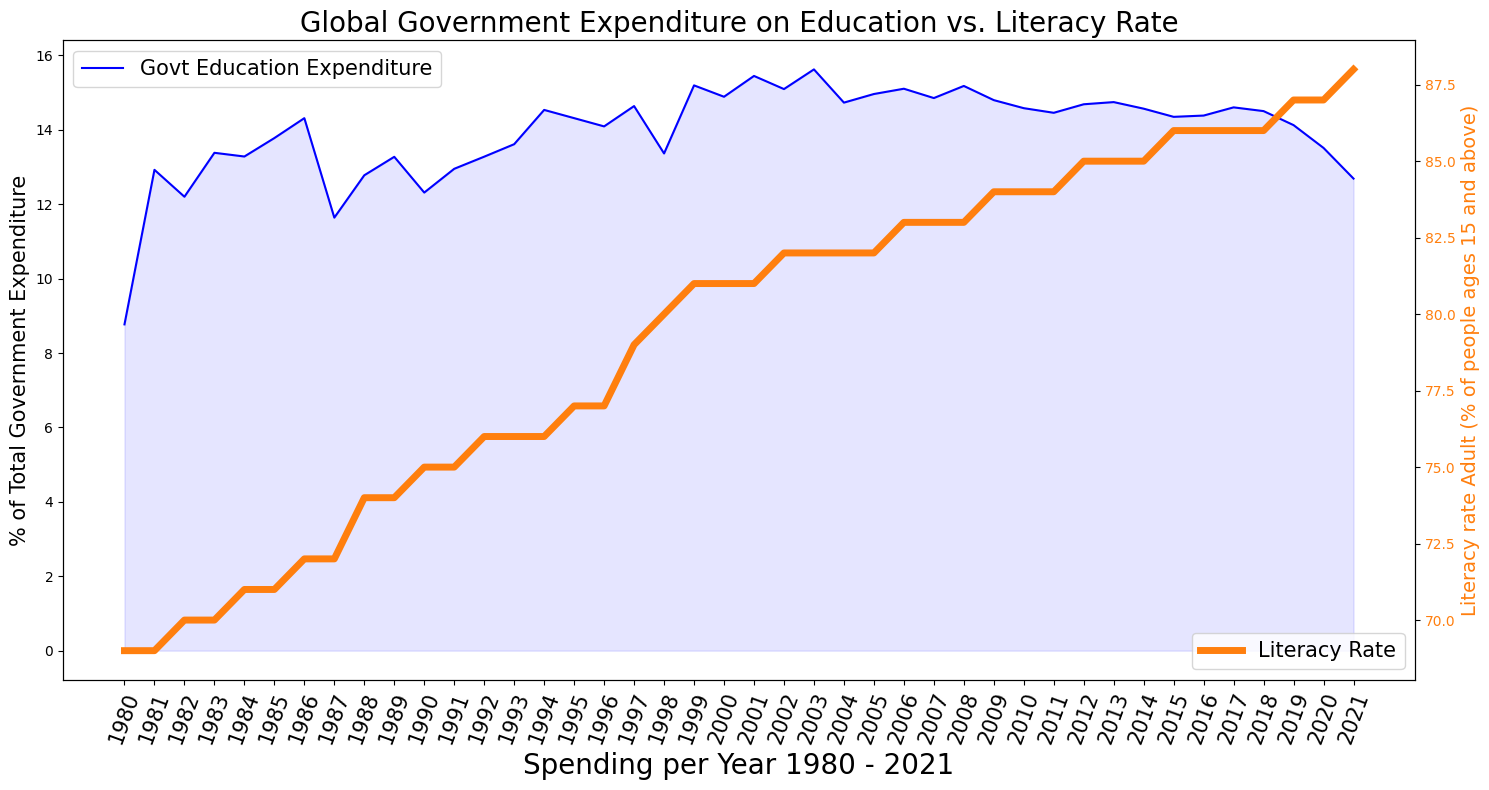

In [15]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

ax.plot(date_range_plt, govt_ed_spend_per_year, color='blue', alpha=1.00)

ax.fill_between(date_range_plt, govt_ed_spend_per_year, 0, color='blue', alpha=.1)

plt.xticks(rotation=70,fontsize = 15)
ax.set_title("Global Government Expenditure on Education vs. Literacy Rate", fontsize = 20)
ax.set_xlabel("Spending per Year 1980 - 2021", fontsize = 20)
ax.set_ylabel("% of Total Government Expenditure",fontsize = 15)

ax2 = ax.twinx()

color = 'tab:orange'
ax2.set_ylabel('Literacy rate Adult (% of people ages 15 and above)',color=color,fontsize = 14)
ax2.plot(date_range_plt,literacy_value_np,color=color,linewidth=5)
ax2.tick_params(axis='y',labelcolor=color)
#ax2.set_ylim(1.5,3.0)

ax.legend(['Govt Education Expenditure'],fontsize = 15, loc='upper left')
ax2.legend(['Literacy Rate'],fontsize = 15, loc='lower right')
#ax2.legend(['First line', 'Second line'],fontsize = 15)

fig.tight_layout()

plt.show()